In [94]:
# 🌧️ Zindi Hackathon - Starter Notebook: Predicting Corrected Precipitation (PRECTOTCORR)

# 📥 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [95]:
# 📁 2. Load the datasets
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (3579, 13)
Test shape: (1535, 12)


,ID,YEAR,MO,DY,WS2M,T2M,T2MDEW,T2MWET,Target,RH2M,PS,QV2M,DATE
0,ID_IODka8_20140721,2014,7,21,1.83,22.67,18.75,20.71,0.00,79.73,96.49,14.07,2014-07-21
1,ID_JeycV8_20110904,2011,9,4,2.92,25.99,18.95,22.47,0.01,66.80,96.11,14.30,2011-09-04
2,ID_gdbFWm_20180416,2018,4,16,1.06,25.29,22.11,23.70,3.85,83.56,96.30,17.37,2018-04-16
3,ID_lR86N5_20190506,2019,5,6,0.66,26.04,22.93,24.49,2.80,83.68,96.15,18.30,2019-05-06
4,ID_v4KHmp_20200908,2020,9,8,1.86,25.35,20.98,23.16,2.58,77.90,96.10,16.24,2020-09-08


In [96]:
train.head()


,ID,YEAR,MO,DY,WS2M,T2M,T2MDEW,T2MWET,Target,RH2M,PS,QV2M,DATE
0,ID_IODka8_20140721,2014,7,21,1.83,22.67,18.75,20.71,0.00,79.73,96.49,14.07,2014-07-21
1,ID_JeycV8_20110904,2011,9,4,2.92,25.99,18.95,22.47,0.01,66.80,96.11,14.30,2011-09-04
2,ID_gdbFWm_20180416,2018,4,16,1.06,25.29,22.11,23.70,3.85,83.56,96.30,17.37,2018-04-16
3,ID_lR86N5_20190506,2019,5,6,0.66,26.04,22.93,24.49,2.80,83.68,96.15,18.30,2019-05-06
4,ID_v4KHmp_20200908,2020,9,8,1.86,25.35,20.98,23.16,2.58,77.90,96.10,16.24,2020-09-08


In [97]:
test.head()

,ID,YEAR,MO,DY,WS2M,T2M,T2MWET,T2MDEW,RH2M,PS,QV2M,DATE
0,ID_OdrVnE_20110615,2011,6,15,1.50,24.58,22.92,21.27,82.72,96.19,16.51,2011-06-15
1,ID_MdWBtG_20230910,2023,9,10,1.80,25.27,22.97,20.66,76.89,96.25,15.89,2023-09-10
2,ID_YQ3N92_20180517,2018,5,17,0.98,24.98,23.32,21.67,82.71,96.10,16.94,2018-05-17
3,ID_73qWlF_20130902,2013,9,2,1.38,25.55,22.48,19.42,70.13,96.22,14.71,2013-09-02
4,ID_3u9JmK_20210212,2021,2,12,1.42,25.31,24.19,23.06,87.88,95.97,18.49,2021-02-12


In [98]:
train.shape[0], train['ID'].nunique(), test.shape[0], test['ID'].nunique()

(3579, 3579, 1535, 1535)

In [99]:
## Are the ID unique, no interaction between train & test
train['ID'].isin(test['ID']).sum(), test['ID'].isin(train['ID']).sum()

(np.int64(0), np.int64(0))

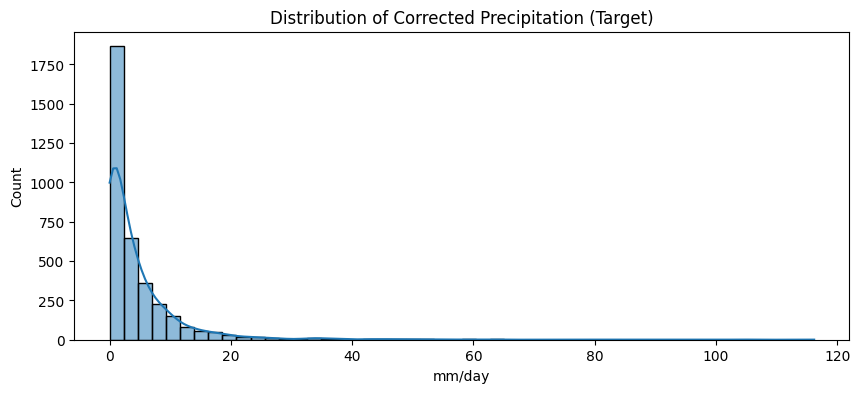

In [100]:
# 📊 3. Quick visualization
plt.figure(figsize=(10, 4))
sns.histplot(train['Target'], bins=50, kde=True)
plt.title("Distribution of Corrected Precipitation (Target)")
plt.xlabel("mm/day")
plt.show()

In [101]:
# 🧼 4. Quick preprocessing (for the example)
# Replace -999 with NaN
train.replace(-999, np.nan, inplace=True)
test.replace(-999, np.nan, inplace=True)


In [102]:
# Drop rows with missing values (only for demo purposes – improve this in your model!)
train_clean = train.dropna()

# 🧠 5. Simple model: Linear Regression
features = ['WS2M', 'T2M', 'T2MWET', 'T2MDEW', 'RH2M', 'PS', 'QV2M']
X = train_clean[features]
y = train_clean['Target']


In [103]:
from sklearn.metrics import mean_squared_error
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"✅ Validation RMSE: {rmse:.4f}")


✅ Validation RMSE: 7.5893


In [104]:
# 📤 6. Predict on test set and create submission file
X_test = test[features].copy()
X_test.fillna(X.mean(), inplace=True)  # simple fill for the demo – use better imputation in real solutions

# Make predictions
test_predictions = model.predict(X_test)


In [105]:
# Create submission file
submission = test[['ID']].copy()
submission['Target'] = test_predictions
submission.to_csv("SampleSubmission.csv", index=False)

print("🎉 SampleSubmission.csv created!")
submission.head()


🎉 SampleSubmission.csv created!


,ID,Target
0,ID_OdrVnE_20110615,4.251614
1,ID_MdWBtG_20230910,0.822683
2,ID_YQ3N92_20180517,5.785069
3,ID_73qWlF_20130902,-1.399814
4,ID_3u9JmK_20210212,10.071500
